In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

c:\users\user\miniconda3\envs\bd\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\user\miniconda3\envs\bd\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\user\miniconda3\envs\bd\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


# training data prepare

In [2]:
df_train=pd.read_csv('./data/train.csv')

In [3]:
#build label
df_train_label=pd.DataFrame(df_train['Survived'])

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 去掉很明顯無關或資料缺失過多的特徵
# 乘客號碼(PassengerId),標籤(survived),名字(name),票號(Ticket),船艙號碼(Cabin),
df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

# $EDA---Survived\ correlation$

In [7]:
#pclass:艙位,sex:性別,Age:年齡,Sibsp:在船上同為兄弟姐妹或配偶的數目,parch:在船上同為家族的父母及小孩的數目
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

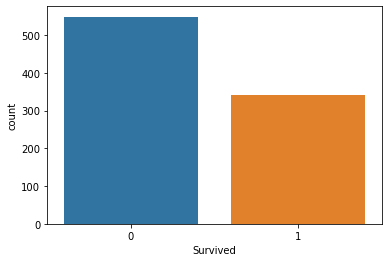

In [8]:
#存活人數
sns.countplot(x='Survived',data=df_train)

# $From\ Pclass\ to\ Age\ and\ Sex$

<AxesSubplot:xlabel='Pclass', ylabel='count'>

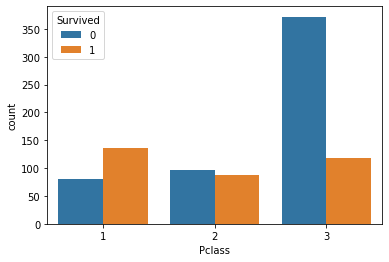

In [9]:
#哪個船艙死最多人
#problem---什麼樣的人會去住三號船艙
sns.countplot(x=df_train['Pclass'],hue=df_train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

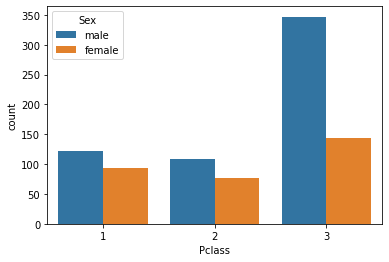

In [10]:
#三號船艙男生最多
#problem---性別跟存活相關性
sns.countplot(x=df_train['Pclass'],hue=df_train['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

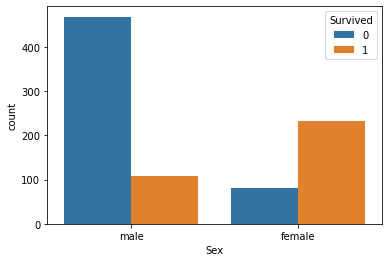

In [11]:
#性別和存活相關性--男生死最多
sns.countplot(x=df_train['Sex'],hue=df_train['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

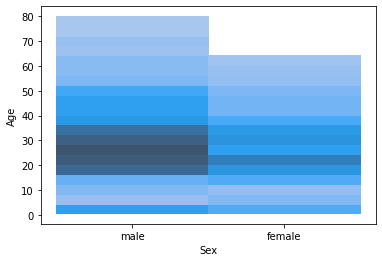

In [12]:
#性別vs年齡 20~30歲居多是男生
sns.histplot(x=df_train['Sex'],y=df_train['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

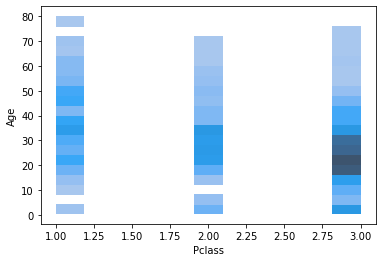

In [13]:
#船艙vs年齡  20~30歲集中在3號船艙
sns.histplot(x=df_train['Pclass'],y=df_train['Age'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

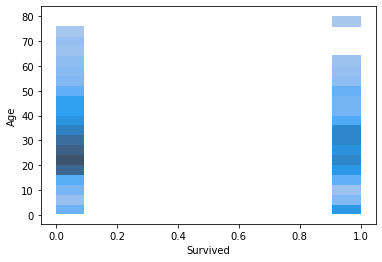

In [14]:
#三號船艙:死亡人數最多,且居多是20~30歲的男性
#特徵:船艙,年齡,性別和存活有相關性
sns.histplot(x=df_train['Survived'],y=df_train['Age'])

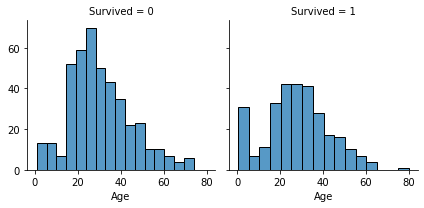

In [15]:
#result
s=sns.FacetGrid(df_train,col='Survived')
s.map(sns.histplot,'Age',kde=False)

# SibSp:spouce ,siblings  

<AxesSubplot:xlabel='SibSp', ylabel='count'>

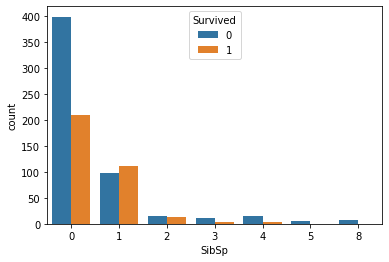

In [16]:
#有配偶和兄弟姊妹的人和是否存活成正相關
sns.countplot(x=df_train['SibSp'],hue=df_train['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

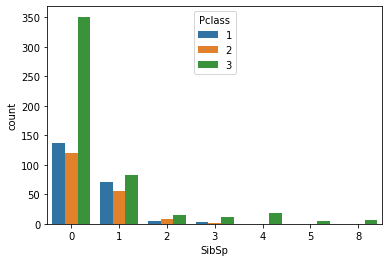

In [17]:
#配偶兄弟姊妹vs船艙分布
#三號船艙的人幾乎沒有配偶或兄弟姊妹----推斷是三號艙20~30歲的男生----和存活成相關性
sns.countplot(x=df_train['SibSp'],hue=df_train['Pclass'])

# $Parch:parent ,\ children$

<AxesSubplot:xlabel='Parch', ylabel='count'>

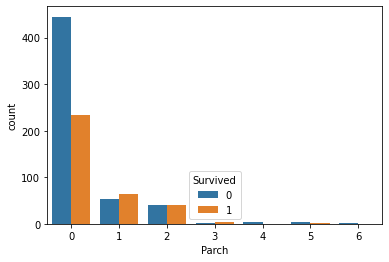

In [18]:
#有沒有父母和小孩和存活成正相關
sns.countplot(x=df_train['Parch'],hue=df_train['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

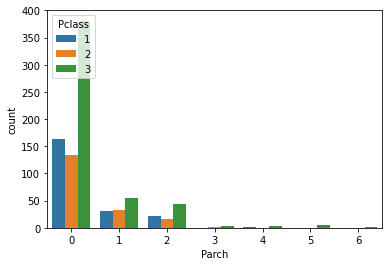

In [19]:
#父母小孩vs船艙分布
#三號船艙的人幾乎沒有小孩和父母----推斷是三號艙20~30歲的男生----和存活成相關性
sns.countplot(x=df_train['Parch'],hue=df_train['Pclass'])
#推論:三號船艙的男生是出來打拼20~30歲的年輕人

# $Embark$

<AxesSubplot:xlabel='Embarked', ylabel='count'>

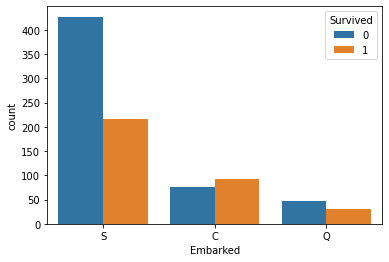

In [20]:
#在S點上船的人死最多---S點的人被分配到哪個船艙
sns.countplot(x=df_train['Embarked'],hue=df_train['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

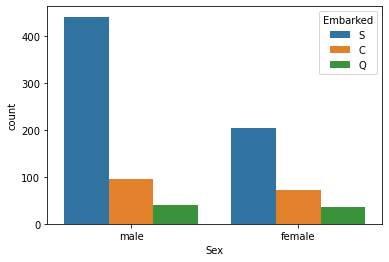

In [21]:
#性別和上船地點
#男生多半是從S點上船
sns.countplot(x=df_train['Sex'],hue=df_train['Embarked'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

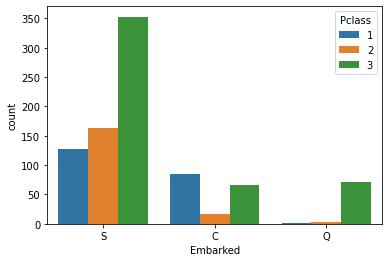

In [22]:
#S點的人多半被分配到三號船艙----推論三號船艙20~30歲的男姓幾乎是從S點上船的----和存活成相關性
sns.countplot(x=df_train['Embarked'],hue=df_train['Pclass'])

# $Fare$

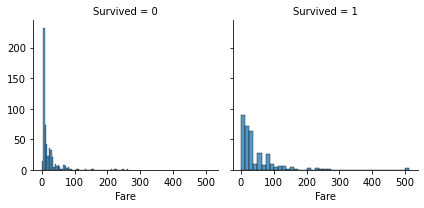

In [23]:
#越貼近免費死越多人
s=sns.FacetGrid(df_train,col='Survived')
s.map(sns.histplot,'Fare',kde=False)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

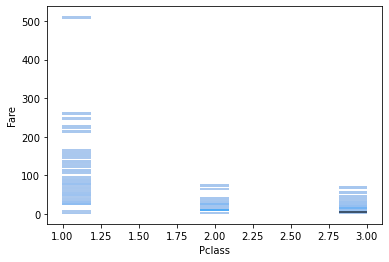

In [24]:
#船艙和價格關係----1號船艙比其他船艙價格貴
#三號船艙住低價房的人多-----推論是那些20~30歲男性
sns.histplot(x=df_train['Pclass'],y=df_train['Fare'])

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

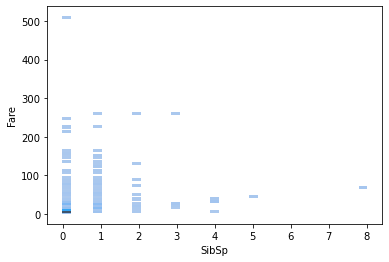

In [27]:
#兄弟姊妹和配偶數量vs價格-----無相關性
sns.histplot(x=df_train['SibSp'],y=df_train['Fare'])

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

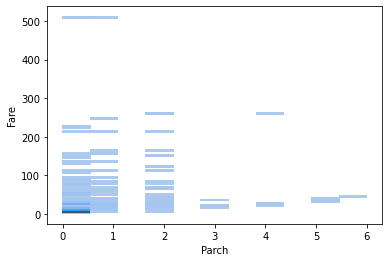

In [28]:
#父母小孩數量vs價格----無相關性
sns.histplot(x=df_train['Parch'],y=df_train['Fare'])

In [29]:
#船艙,年齡,性別,上船位置,父母小孩,配偶兄弟姊妹,價格皆與存活相關
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [30]:
#drop label
df_train.drop(['Survived'],axis=1,inplace=True)

In [137]:
df_train_norm=(df_train-df_train.mean())/df_train.std()

<AxesSubplot:>

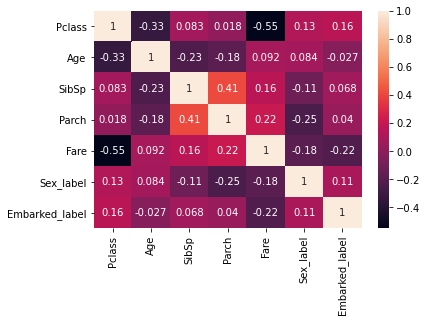

In [139]:
# correlation plot
#pclass:1,2,3
#sex: male(1),female(0)
#survived: alive(1),die(0)
#fate:cheap to expensive
#embark : C(0),Q(1),S(2)

sns.heatmap(df_train_norm.corr(),annot=True)

# build model

# $data\ preprocess$

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [33]:
df_train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [34]:
#fill nan with mean 
df_train.Age.fillna(df_train.Age.mean(),inplace=True)

In [35]:
df_train['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [36]:
#fill nan with the largest count embarked
df_train.Embarked.fillna('S',inplace=True)

In [37]:
df_train.isnull().value_counts()

Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False   False  False  False  False  False  False       891
dtype: int64

In [38]:
#replace number to label
#sex:male,female ---0,1
#embarked:S,C,Q----0,1,2
replace = LabelEncoder()

#sex
replace.fit(df_train.Sex)
Sex_label = replace.transform(df_train.Sex)
df_train['Sex_label'] = Sex_label
df_train.drop(['Sex'],axis=1,inplace=True)

#embarked
replace.fit(df_train.Embarked)
Embarked_label = replace.transform(df_train.Embarked)
df_train['Embarked_label'] = Embarked_label
df_train.drop(['Embarked'],axis=1,inplace=True)


In [39]:
df_train

,Pclass,Age,SibSp,Parch,Fare,Sex_label,Embarked_label
0,3,22.000000,1,0,7.2500,1,2
1,1,38.000000,1,0,71.2833,0,0
2,3,26.000000,0,0,7.9250,0,2
3,1,35.000000,1,0,53.1000,0,2
4,3,35.000000,0,0,8.0500,1,2
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,2
887,1,19.000000,0,0,30.0000,0,2
888,3,29.699118,1,2,23.4500,0,2
889,1,26.000000,0,0,30.0000,1,0


In [40]:
#process
X=np.array(df_train)
y=np.array(df_train_label).astype(np.float32)
X.shape,y.shape

((891, 7), (891, 1))

In [132]:
from sklearn.model_selection import train_test_split as ttp
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=ttp(X,y,random_state=1,test_size=0.2)

#squeeze y
y_train=y_train.squeeze()
y_test=y_test.squeeze()


#normalzie
normalize=StandardScaler()
normalize.fit(X_train)
X_train=normalize.transform(X_train)
normalize.fit(X_test)
X_test=normalize.transform(X_test)

# build model 

# $logistic\ regression$

In [131]:
from sklearn.linear_model import LogisticRegression

In [125]:
normalize=StandardScaler()
normalize.fit(X)
X_norm=normalize.transform(X)

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
#tunning hyperparameters: C(lambda) , max_iter , random_state

reg=LogisticRegression()

params={
    'C':[0.5,1.0,1.2,1.5],
    'max_iter':[50,100,150],
    'random_state':[1,2,3,4]
}
grid=GridSearchCV(
    reg,
    params,
    cv=3,
    verbose=2,
    scoring='accuracy',
    refit=True
)
grid.fit(X_norm,y)
print("best score: {:.3f}, best params: {}".format(grid.best_score_, grid.best_params_))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.5, max_iter=50, random_state=1 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=1, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=1 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=1, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=1 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=1, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=2 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=2, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=2 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=2, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=2 ..............................
[CV] ............... C=0.5, max_iter=50, random_state=2, total=   0.0s
[CV] C=0.5, max_iter=50, random_state=3 ..............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.5, max_iter=150, random_state=1 .............................
[CV] .............. C=0.5, max_iter=150, random_state=1, total=   0.0s
[CV] C=0.5, max_iter=150, random_state=2 .............................
[CV] .............. C=0.5, max_iter=150, random_state=2, total=   0.0s
[CV] C=0.5, max_iter=150, random_state=2 .............................
[CV] .............. C=0.5, max_iter=150, random_state=2, total=   0.0s
[CV] C=0.5, max_iter=150, random_state=2 .............................
[CV] .............. C=0.5, max_iter=150, random_state=2, total=   0.0s
[CV] C=0.5, max_iter=150, random_state=3 .............................
[CV] .............. C=0.5, max_iter=150, random_state=3, total=   0.0s
[CV] C=0.5, max_iter=150, random_state=3 .............................
[CV] .............. C=0.5, max_iter=150, random_state=3, total=   0.0s
[CV] C=0.5, max_iter=150, random_state=3 .............................
[CV] .............. C=0.5, max_iter=150, random_state=3, total=   0.0s
[CV] 

[CV] ............... C=1.5, max_iter=50, random_state=2, total=   0.0s
[CV] C=1.5, max_iter=50, random_state=2 ..............................
[CV] ............... C=1.5, max_iter=50, random_state=2, total=   0.0s
[CV] C=1.5, max_iter=50, random_state=2 ..............................
[CV] ............... C=1.5, max_iter=50, random_state=2, total=   0.0s
[CV] C=1.5, max_iter=50, random_state=3 ..............................
[CV] ............... C=1.5, max_iter=50, random_state=3, total=   0.0s
[CV] C=1.5, max_iter=50, random_state=3 ..............................
[CV] ............... C=1.5, max_iter=50, random_state=3, total=   0.0s
[CV] C=1.5, max_iter=50, random_state=3 ..............................
[CV] ............... C=1.5, max_iter=50, random_state=3, total=   0.0s
[CV] C=1.5, max_iter=50, random_state=4 ..............................
[CV] ............... C=1.5, max_iter=50, random_state=4, total=   0.0s
[CV] C=1.5, max_iter=50, random_state=4 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.6s finished


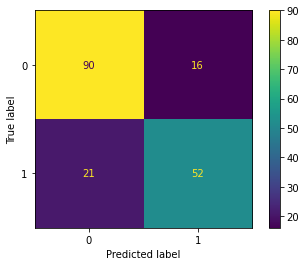

In [129]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid.best_estimator_,X_test,y_test,labels=[0,1])

# $neural\ network\ with\ tunning\ hyperparameters$

In [45]:
#skorch method
from skorch import NeuralNetBinaryClassifier

#pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [46]:
#features
X.shape[1]

7

In [47]:
#reprocess

X = X.astype(np.float32)
y = y.astype(np.float32).squeeze()

#normalzie
normalize=StandardScaler()
normalize.fit(X)
X_norm=normalize.transform(X)

In [48]:
X_norm.shape,y.shape

((891, 7), (891,))

In [52]:
#model
class logistic_network(nn.Module):
    def __init__(self,prob,num_units=16):
        super(logistic_network,self).__init__()
        self.prob=prob
        self.input=nn.Linear(7,num_units)
        self.h=nn.Linear(num_units,num_units)
        self.output=nn.Linear(num_units,1)
        self.initialize()
        
        
    #initialize
    def initialize(self):
        for name,params in logistic_network.named_parameters(self):
            #relu layer initialize
            if 'output.weight' not in name and 'weight' in name:
                n=params.shape[1]
                torch.nn.init.normal_(params, mean=0, std=torch.sqrt(torch.tensor(2/n)))
        
    def forward(self,X):
        a1=F.relu(self.input(X))
        a2=F.dropout(F.relu(self.h(a1)),p=self.prob, training=self.training)
        a3=self.output(a2)
        return a3

In [53]:
#setting model

#theshold default:0.5
model = NeuralNetBinaryClassifier(
    logistic_network,
    max_epochs=100,
    lr=0.001,
    optimizer=optim.Adam, #optimizer
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
    criterion=nn.BCEWithLogitsLoss,
    device=torch.device('cuda'),
)

In [76]:
#tunning hyperparameters: lr , num_unis , dropout prob , optimizer , max_epochs

from sklearn.model_selection import RandomizedSearchCV


# deactivate skorch-internal train-valid split and verbose logging
model.set_params(train_split=False, verbose=0)


params = {
    'lr': [10**(-4*np.random.rand()) for i in range(30)], # seach between 0.999~10^-4
    'max_epochs': [30,50,100],
    'module__num_units': [8,16,32],
    'module__prob':[0.2,0.3,0.5],
    'optimizer':[optim.Adam,optim.SGD,optim.RMSprop]
}

#cvint, cross-validation generator or an iterable
#cv=kfold(3),default 5
gs =RandomizedSearchCV(model, params, refit=True, cv=3, scoring='accuracy', verbose=2)

gs.fit(X_norm, y)
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] optimizer=<class 'torch.optim.rmsprop.RMSprop'>, module__prob=0.3, module__num_units=16, max_epochs=30, lr=0.38142619994757615 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  optimizer=<class 'torch.optim.rmsprop.RMSprop'>, module__prob=0.3, module__num_units=16, max_epochs=30, lr=0.38142619994757615, total=   0.5s
[CV] optimizer=<class 'torch.optim.rmsprop.RMSprop'>, module__prob=0.3, module__num_units=16, max_epochs=30, lr=0.38142619994757615 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  optimizer=<class 'torch.optim.rmsprop.RMSprop'>, module__prob=0.3, module__num_units=16, max_epochs=30, lr=0.38142619994757615, total=   0.5s
[CV] optimizer=<class 'torch.optim.rmsprop.RMSprop'>, module__prob=0.3, module__num_units=16, max_epochs=30, lr=0.38142619994757615 
[CV]  optimizer=<class 'torch.optim.rmsprop.RMSprop'>, module__prob=0.3, module__num_units=16, max_epochs=30, lr=0.38142619994757615, total=   0.5s
[CV] optimizer=<class 'torch.optim.sgd.SGD'>, module__prob=0.5, module__num_units=32, max_epochs=100, lr=0.016836400389035285 
[CV]  optimizer=<class 'torch.optim.sgd.SGD'>, module__prob=0.5, module__num_units=32, max_epochs=100, lr=0.016836400389035285, total=   1.4s
[CV] optimizer=<class 'torch.optim.sgd.SGD'>, module__prob=0.5, module__num_units=32, max_epochs=100, lr=0.016836400389035285 
[CV]  optimizer=<class 'torch.optim.sgd.SGD'>, module__prob=0.5, module__num_units=32, max_epochs=100, lr=0.016836400389035285, total=   1.4s
[CV] optimizer=<class 'torch.opti

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   31.0s finished


best score: 0.828, best params: {'optimizer': <class 'torch.optim.adam.Adam'>, 'module__prob': 0.2, 'module__num_units': 8, 'max_epochs': 100, 'lr': 0.009878646709647346}


In [77]:
#return best model
gs.best_score_

0.8282828282828283

In [78]:
final_model=gs.best_estimator_

In [159]:
#compare logistic regression and network
print('logistic regression--',grid.best_estimator_.score(X_test,y_test))
print('logistic network--',final_model.score(X_test.astype(np.float32),y_test))

logistic regression-- 0.7932960893854749
logistic network-- 0.8324022346368715


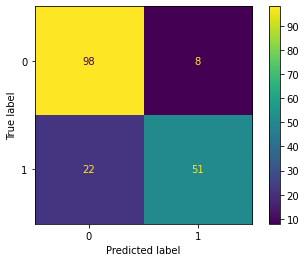

In [161]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model,X_test.astype(np.float32),y_test,labels=[0,1])

# submit

In [89]:
df_test=pd.read_csv('./data/test.csv')
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df_test.Age.fillna(df_train.Age.mean(),inplace=True)
df_test.Embarked.fillna('S',inplace=True)
df_test.Fare.fillna(df_train.Fare.mean(),inplace=True)

In [90]:
replace = LabelEncoder()

#sex
replace.fit(df_test.Sex)
Sex_label = replace.transform(df_test.Sex)
df_test['Sex_label'] = Sex_label
df_test.drop(['Sex'],axis=1,inplace=True)

#embarked
replace.fit(df_test.Embarked)

Embarked_label = replace.transform(df_test.Embarked)

df_test['Embarked_label'] = Embarked_label
df_test.drop(['Embarked'],axis=1,inplace=True)

In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            418 non-null    float64
 5   Sex_label       418 non-null    int32  
 6   Embarked_label  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [92]:
np.array(df_test).shape

(418, 7)

In [93]:
#normalize
normal= StandardScaler()

X_test=np.array(df_test)

normal.fit(X_test)
X_test_norm=normal.transform(X_test)
X_test_norm=X_test_norm.astype(np.float32)

In [94]:

Survived=final_model.predict(X_test_norm).squeeze().astype('int32')

In [95]:
#submit
PassengerId = np.arange(892,1310)

submit = pd.DataFrame(list(zip(PassengerId,Survived)),columns=['PassengerId','Survived'])

In [96]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [97]:
submit.to_csv("final_ans.csv",index=False)